Uploading Datasets

In [1]:
import pandas as pd
train_df = pd.read_csv('train_data.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_df = pd.read_csv('test_data.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])
test_solution_df = pd.read_csv('test_data_solution.txt', delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

In [2]:
print(train_df.head())

   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [3]:
print(train_df.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

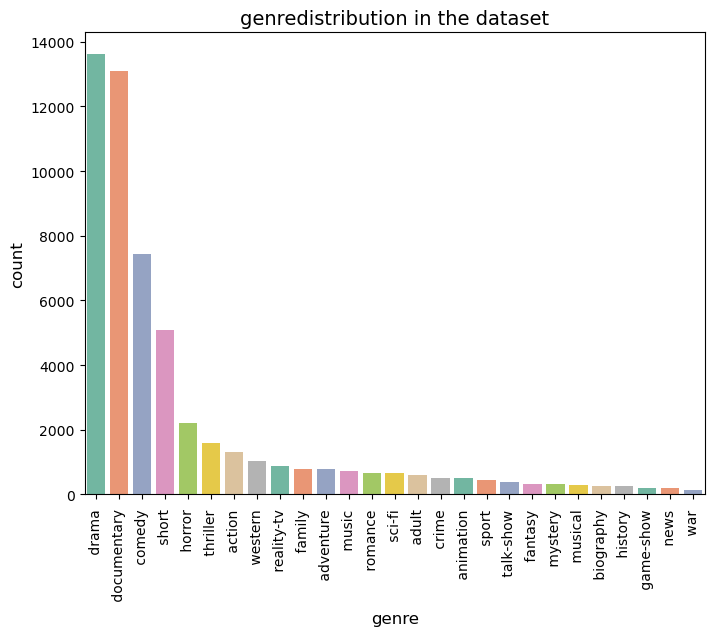

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df,x='GENRE', order=train_df['GENRE'].value_counts().index,palette='Set2')
plt.title('genredistribution in the dataset', fontsize=14)
plt.xlabel('genre',fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Pre-processing

In [6]:
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#function
def clean_text(text):
    text = text.lower() 
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = ' '.join([word for word in text.split() if word not in stop_words]) 
    return text

In [10]:
#text cleaning
train_df['CLEANED_DESCRIPTION'] = train_df['DESCRIPTION'].apply(clean_text)
#TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['CLEANED_DESCRIPTION'])

In [11]:
# encode target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['GENRE'])

In [12]:
print(train_df[['GENRE', 'CLEANED_DESCRIPTION']].head())

        GENRE                                CLEANED_DESCRIPTION
0      drama   listening conversation doctor parents yearold ...
1   thriller   brother sister past incestuous relationship cu...
2      adult   bus empties students field trip museum natural...
3      drama   help unemployed father make ends meet edith tw...
4      drama   films title refers unrecovered bodies ground z...


Training

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [14]:
#extracting features and target labels
X_train = vectorizer.fit_transform(train_df['CLEANED_DESCRIPTION'])
y_train = label_encoder.fit_transform(train_df['GENRE'])

In [15]:
logreg_model = LogisticRegression(max_iter=1000)

In [16]:
# training
logreg_model.fit(X_train, y_train)
print("Model training is complete!")

Model training is complete!


cleaning the test data

In [17]:
test_df['CLEANED_DESCRIPTION'] = test_df['DESCRIPTION'].apply(clean_text)
X_test = vectorizer.transform(test_df['CLEANED_DESCRIPTION'])
predicted_genres = logreg_model.predict(X_test)
predicted_genres = label_encoder.inverse_transform(predicted_genres)

In [18]:
test_df['PREDICTED_GENRE'] = predicted_genres
test_df.to_csv('predicted_genres.csv', columns=['ID', 'TITLE', 'PREDICTED_GENRE'], index=False)


In [19]:
print(test_df[['ID', 'TITLE', 'PREDICTED_GENRE']].head())

   ID                          TITLE PREDICTED_GENRE
0   1          Edgar's Lunch (1998)           drama 
1   2      La guerra de papá (1977)           drama 
2   3   Off the Beaten Track (2010)     documentary 
3   4        Meu Amigo Hindu (2015)           drama 
4   5             Er nu zhai (1955)           drama 


Accuracy score 

In [20]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
merged_df = test_solution_df[['ID', 'GENRE']].merge(test_df[['ID', 'PREDICTED_GENRE']], on='ID')

In [22]:
accuracy = accuracy_score(merged_df['GENRE'], merged_df['PREDICTED_GENRE'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5838
